## **1. Multiple linear regression model**



1.1 Set-up the environment

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

1.2 Import of historical data

In [ ]:
spy = pd.read_csv('/content/drive/MyDrive/SPY.csv', index_col= 'Date')
nikkei = pd.read_csv('/content/drive/MyDrive/Nikkei_225.csv', index_col= 'Date')
nasdaq = pd.read_csv('/content/drive/MyDrive/Nasdaq_Composite.csv', index_col= 'Date')
hsi = pd.read_csv('/content/drive/MyDrive/Hang_Seng_Index.csv', index_col= 'Date')
daxi = pd.read_csv('/content/drive/MyDrive/GDAXI.csv', index_col= 'Date')
cac40 = pd.read_csv('/content/drive/MyDrive/CAC_40.csv', index_col= 'Date')
nasdaq.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-22,8038.790039,8048.580078,7937.120117,7991.390137,7991.390137,1780760000
2019-08-23,7943.649902,8005.339844,7730.770020,7751.770020,7751.770020,2214370000
2019-08-26,7829.580078,7856.040039,7789.049805,7853.740234,7853.740234,1691990000
2019-08-27,7908.779785,7916.830078,7795.180176,7826.950195,7826.950195,1914930000
2019-08-28,7798.350098,7866.870117,7766.669922,7856.879883,7856.879883,1663450000


1.3 Data Munging

In [ ]:
# Building of the trading model data frame, named 'indicepanel', to account for different timezones
indicepanel = pd.DataFrame(index=spy.index)
indicepanel['spy']= spy['Open'].shift(-1)-spy['Open']
indicepanel['spy_lag1'] = indicepanel['spy'].shift(1)
indicepanel['nasdaq'] = nasdaq['Open'] - nasdaq['Open'].shift(1)
indicepanel['cac40'] = cac40['Open'] - cac40['Open'].shift(1)
indicepanel['daxi']= daxi['Open'] - daxi['Open'].shift(1)
indicepanel['hsi'] = hsi['Close'] - hsi['Open']
indicepanel['nikkei'] = nikkei['Close'] - nikkei['Open']
indicepanel['Price'] = spy['Open']
indicepanel.head()

,spy,spy_lag1,nasdaq,cac40,daxi,hsi,nikkei,Price
Date,,,,,,,,
2019-08-22,-2.309998,NaN,NaN,NaN,NaN,-224.189453,-78.060547,293.230011
2019-08-23,-3.650024,-2.309998,-95.140137,-1.399903,NaN,121.449219,130.929687,290.920013
2019-08-26,2.270020,-3.650024,-114.069824,-103.250000,-185.820313,358.330078,-64.400390,287.269989
2019-08-27,-3.399994,2.270020,79.199707,39.689942,18.849610,-51.910156,-11.140625,289.540009
2019-08-28,5.579986,-3.399994,-110.429687,22.229980,66.160156,-151.599609,5.109375,286.140015


In [ ]:
# Forward fill of NaN values and elimination of remining NaN values
indicepanel.isnull().sum()
indicepanel = indicepanel.fillna(method='ffill')
indicepanel = indicepanel.dropna()
indicepanel.isnull().sum()

,0
spy,0
spy_lag1,0
nasdaq,0
cac40,0
daxi,0
hsi,0
nikkei,0
Price,0


In [ ]:
# Saving the data frame 'indicepanel'
path_save = '/content/drive/MyDrive/indicepanel.csv'
indicepanel.to_csv(path_save)
print(indicepanel.shape)

(1256, 8)


1.4 Data Spliting

In [ ]:
# Splitting the data in a Train set and a Test one
Train = indicepanel.iloc[-1000:-500, :]
Test = indicepanel.iloc[-500:, :]
print(Train.shape, Test.shape)

(500, 8) (500, 8)


1.5 Exploration of training data set

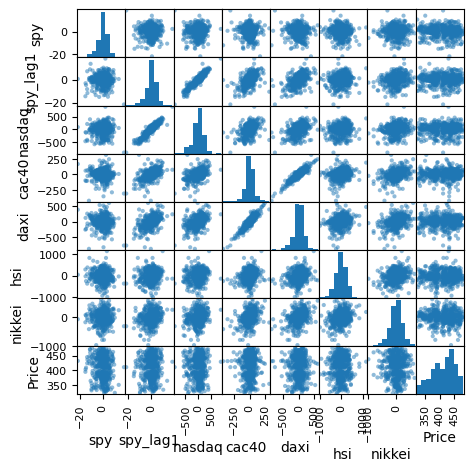

In [ ]:
# Generation of scatter matrix to observe the relationships among the variables
from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(5,5))

1.6 Computation of correlation between each index and SPY

In [ ]:
# Finding the indice with the largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.001156
nasdaq      0.034556
cac40      -0.041822
daxi       -0.057785
hsi        -0.082017
nikkei      0.028008
Name: spy, dtype: float64


1.7 Model computation

In [ ]:
# Execution of linear regression
formula ='spy~spy_lag1+nasdaq+cac40+daxi+nikkei+hsi'
lm=smf.ols(formula=formula, data=Train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    spy   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.952
Date:                Mon, 09 Sep 2024   Prob (F-statistic):             0.0709
Time:                        14:30:45   Log-Likelihood:                -1468.4
No. Observations:                 500   AIC:                             2951.
Df Residuals:                     493   BIC:                             2980.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1054      0.207      0.509      0.611      -0.302       0.512
spy_lag1      -0.2027      0.126     -1.613      0.107      -0.450       0.044
nasdaq         0.0057      0.003      2.072      0.039       0.000       0.011
cac40          0.0041      0.007      0.606      0.545      -0.009       0.017
daxi          -0.0034      0.003     -1.168      0.243      -0.009       0.002
nikkei         0.0014      0.001      1.369      0.172      -0.001       0.003
hsi           -0.0016      0.001     -2.010      0.045      -0.003   -3.68e-05
==============================================================================
Omnibus:                       51.118   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.177
Skew:                          -0.608   Prob(JB):                     2.91e-22
Kurtosis:                       4.811   Cond. No.                         305.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1.8 Make prediction

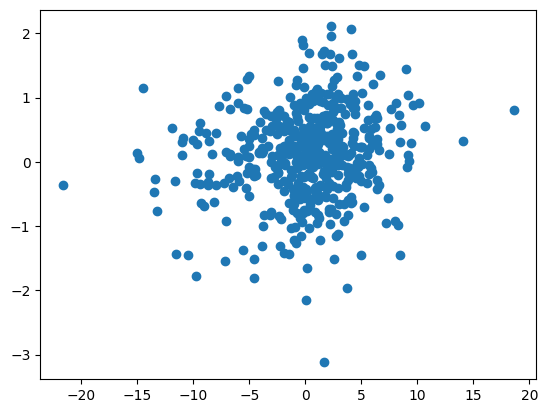

In [ ]:
Train['PredictedY']= lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)
plt.scatter(Train['spy'],Train['PredictedY'])

1.9 Model evaluation - Statistical standard | RMSE, Adjusted R^2

In [ ]:
# Model performances measurement using Root Mean Squared Error, Adjusted R^2
def adjustedMetric(data, model, model_k, yname):
  data['yhat'] = model.predict(data)
  SST = ((data[yname] - data[yname].mean())**2).sum()
  SSR = ((data['yhat'] - data[yname].mean())**2).sum()
  SSE = ((data[yname] - data['yhat'].mean())**2).sum()
  r2 = SSR/SST
  adjustR2 = 1 - (1-r2)*(data.shape[0] - 1)/(data.shape[0] - model_k - 1)
  RMSE = (SSE/(data.shape[0]- model_k -1))**0.5
  return adjustR2, RMSE

def assessTable(test, train, model, model_k, yname):
  r2test, RMSEtest = adjustedMetric(test, model, model_k, yname)
  r2train, RMSEtrain = adjustedMetric(train, model, model_k, yname)
  assessment = pd.DataFrame(index=['R2','RMSE'], columns=['Train', 'Test'])
  assessment['Train'] = [r2train, RMSEtrain]
  assessment['Test'] = [r2test, RMSEtest]
  return assessment

In [ ]:
# Obtain the assessment table for the model
assessTable(Test, Train, lm, 6, 'spy')

,Train,Test
R2,0.011322,0.017110
RMSE,4.649170,4.427609
